This project is from the Google Advanced Data Analytics Certificate program, in particular Course 5. The goal is to use data from the NYC Taxi and Limousine Commission (New York City TLC) to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. 

In [8]:
# Imports
import numpy as np
import pandas as pd
pd.options.mode.copy_on_write = True
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
#import scipy.stats as stats #ttest
import statsmodels.api as sm  #stats.anova_lm, qqplot, Logit, OLS
import statsmodels.formula.api as smf  #formula interface, ols, logit
#from statsmodels.stats.multicomp import pairwise_tukeyhsd #Tukey's HSD function
from sklearn.model_selection import train_test_split  #train_test_split
from sklearn.linear_model import LogisticRegression
import \
    sklearn.metrics as metrics  #confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, accuracy_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay  #from_predictions
from sklearn.preprocessing import StandardScaler  #standardise data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [9]:
# Load dataset into dataframe 
df0 = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")

### Exploratory Data Analysis

In [10]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [11]:
df0.shape

(22699, 18)

Check for missing data:

In [5]:
df0.isna().sum().sum()

0

Remove duplicates

In [12]:
df0=df0.drop_duplicates()

In [13]:
df0.shape

(22699, 18)

In [15]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


Basic stats:

In [16]:
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


Note the presence of large outliers in trip_distance, RatecodeID, fare_amount, tip_amount, tolls_amount and total_amount  

### Formatting

Let's convert the two date columns to a usable format. 

In [17]:
df0['tpep_pickup_datetime']=pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime']=pd.to_datetime(df0['tpep_dropoff_datetime'])

### Feature engineering

Let's make an additional column 'duration' for trip durations (in minutes)

In [19]:
df0['duration']=df0['tpep_dropoff_datetime']-df0['tpep_pickup_datetime']
df0['duration']=df0['duration'].dt.total_seconds()/ 60

### Outliers

Examine outliers to identify erroneous or unusual entries

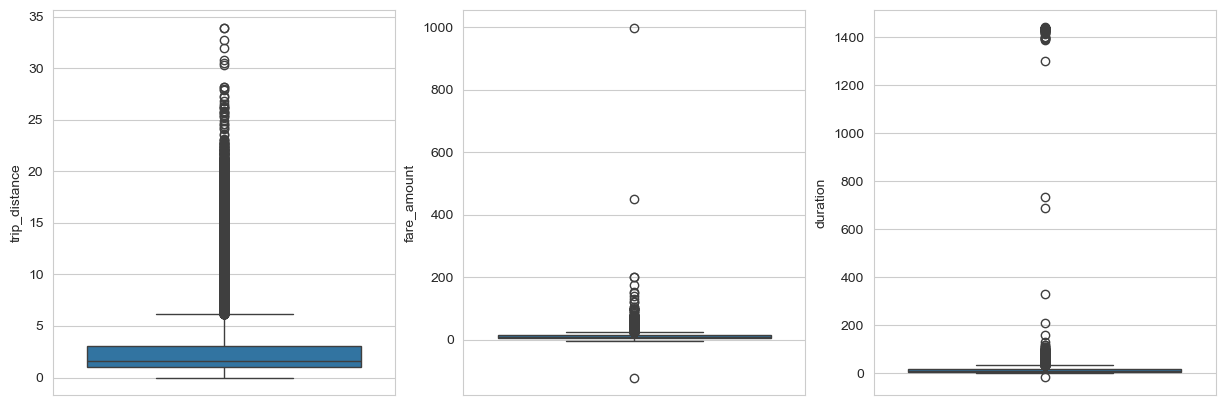

In [25]:
fig,ax= plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data=df0,y='trip_distance',ax=ax[0])
sns.boxplot(data=df0,y='fare_amount',ax=ax[1])
sns.boxplot(data=df0,y='duration',ax=ax[2])
plt.show()

##### trip_distance

In [31]:
df0['trip_distance'].value_counts().sort_index().head(10)

trip_distance
0.00    148
0.01      7
0.02     11
0.03      4
0.04      4
0.05      1
0.06      3
0.07      5
0.08      3
0.09      1
Name: count, dtype: int64

There are 148 trips 0 distance (units are miles) and some with very short distances. These could be from a taxi that was waiting on the clock but then was not taken. These are not enough to cause a problem with any inference and so we leave them in for now.

##### fare_amount

In [32]:
df0[df0['fare_amount']>300]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
8476,11157412,1,2017-02-06 05:50:10,2017-02-06 05:51:08,1,2.6,5,N,226,226,1,999.99,0.0,0.0,200.0,0.0,0.3,1200.29,0.966667
20312,107558404,2,2017-12-19 09:40:46,2017-12-19 09:40:55,2,0.0,5,N,265,265,2,450.00,0.0,0.0,0.0,0.0,0.3,450.30,0.150000


There are 2 very high fares (above $300). They both have RatecodeID=5 (negotiated fare). Such negotiated fares should be removed from the data.

In [34]:
df0[df0['fare_amount']<0]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
314,105454287,2,2017-12-13 02:02:39,2017-12-13 02:03:08,6,0.12,1,N,161,161,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,0.483333
1646,57337183,2,2017-07-05 11:02:23,2017-07-05 11:03:00,1,0.04,1,N,79,79,3,-2.5,0.0,-0.5,0.0,0.0,-0.3,-3.3,0.616667
4423,97329905,2,2017-11-16 20:13:30,2017-11-16 20:14:50,2,0.06,1,N,237,237,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,1.333333
5448,28459983,2,2017-04-06 12:50:26,2017-04-06 12:52:39,1,0.25,1,N,90,68,3,-3.5,0.0,-0.5,0.0,0.0,-0.3,-4.3,2.216667
5758,833948,2,2017-01-03 20:15:23,2017-01-03 20:15:39,1,0.02,1,N,170,170,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,0.266667
8204,91187947,2,2017-10-28 20:39:36,2017-10-28 20:41:59,1,0.41,1,N,236,237,3,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8,2.383333
10281,55302347,2,2017-06-05 17:34:25,2017-06-05 17:36:29,2,0.00,1,N,238,238,4,-2.5,-1.0,-0.5,0.0,0.0,-0.3,-4.3,2.066667
11204,58395501,2,2017-07-09 07:20:59,2017-07-09 07:23:50,1,0.64,1,N,50,48,3,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,2.850000
12944,29059760,2,2017-04-08 00:00:16,2017-04-08 23:15:57,1,0.17,5,N,138,138,4,-120.0,0.0,0.0,0.0,0.0,-0.3,-120.3,1395.683333
14714,109276092,2,2017-12-24 22:37:58,2017-12-24 22:41:08,5,0.40,1,N,164,161,4,-4.0,-0.5,-0.5,0.0,0.0,-0.3,-5.3,3.166667


There are 14 entries with negative fare_amount. They all have payment_type=3 (No charge) or 4 (Dispute). Such fares should be removed. We restrict to payment_type=1 (cash) or 2 (card)

In [35]:
df02=df0[(df0['payment_type'].isin([1,2])) & (df0['RatecodeID']<5)]

In [38]:
df02[df02['fare_amount']<0]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration


Let's plot a histogram to take a close look at the fare_amount

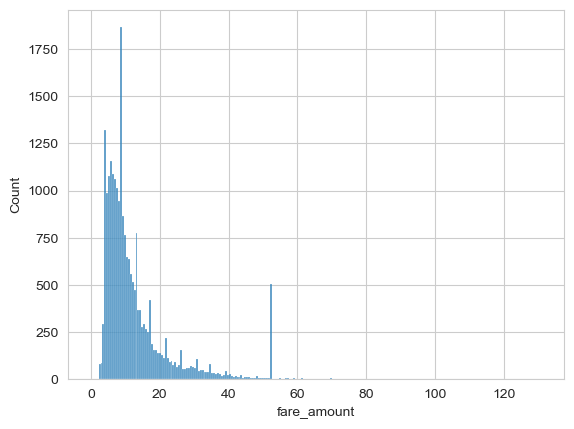

In [59]:
sns.histplot(data=df02,x='fare_amount')
plt.show()

Note the peak at $52

In [61]:
df02[df02['fare_amount']==52].head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333


The entries have RatecodeID=2 (JFK) so this looks like special fare to and from the airport. All trips with that rate code have this fare_amount:

In [62]:
df02[df02['RatecodeID']==2]['fare_amount'].value_counts()

fare_amount
52.0    503
Name: count, dtype: int64

We remove these from the data.

In [66]:
df02=df02[df02['RatecodeID']!=2]

##### duration

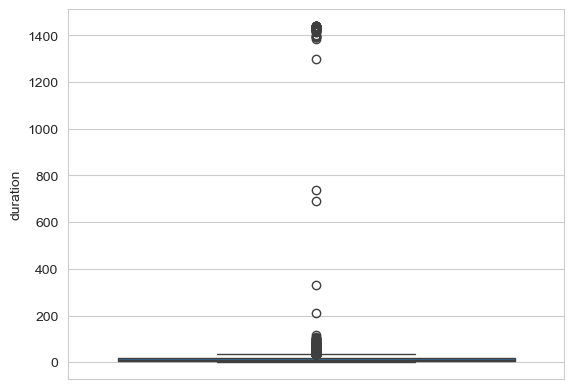

In [67]:
sns.boxplot(data=df02,y='duration')
plt.show()

In [68]:
df02['duration'].describe()

count    21966.000000
mean        16.211814
std         60.571630
min          0.000000
25%          6.633333
50%         11.016667
75%         17.779167
max       1439.550000
Name: duration, dtype: float64

While there are no negative values there are some very high values

In [69]:
df02[df02['duration']>300][['tpep_pickup_datetime', 'tpep_dropoff_datetime','duration', 'trip_distance','fare_amount']]

,tpep_pickup_datetime,tpep_dropoff_datetime,duration,trip_distance,fare_amount
697,2017-06-10 21:55:01,2017-06-11 21:45:51,1430.833333,1.36,8.5
924,2017-02-09 23:24:58,2017-02-10 23:24:31,1439.550000,4.86,17.5
1010,2017-12-08 07:17:20,2017-12-09 07:07:22,1430.033333,0.33,4.5
1199,2017-11-12 19:52:44,2017-11-13 19:37:35,1424.850000,4.14,18.0
1355,2017-04-17 21:26:49,2017-04-18 20:46:13,1399.400000,4.09,15.0
1758,2017-12-28 23:58:24,2017-12-29 23:38:45,1420.350000,1.23,7.0
4600,2017-12-20 08:24:34,2017-12-21 07:39:27,1394.883333,1.26,10.0
5051,2017-08-07 18:27:53,2017-08-08 00:00:00,332.116667,14.35,50.5
5370,2017-12-13 19:40:05,2017-12-14 19:31:09,1431.066667,0.93,12.0
5478,2017-09-19 13:16:13,2017-09-20 12:36:12,1399.983333,0.62,5.5


Most of the high values are slight less than 24hrs (1440 min). The trip distances are not large. This suggests a mistake in the data set. Indeed, ignoring the date of the trip and the time order, the absolute temporal difference is consistent with the trip_distance. The other entries have a drop-off time of 00:00:00. This suggests two kinds of error in the data. Let's remove both of these by restricting to durations less than 1200 minutes and without a drop-off time of 00:00:00.

In [70]:
df03=df02[(df02['tpep_dropoff_datetime'].dt.time!=datetime.time(0,0,0)) &  (df02['duration']<1200) ] 

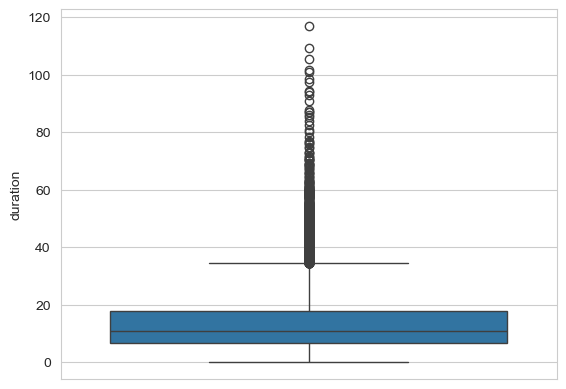

In [71]:
sns.boxplot(data=df03,y='duration')
plt.show()

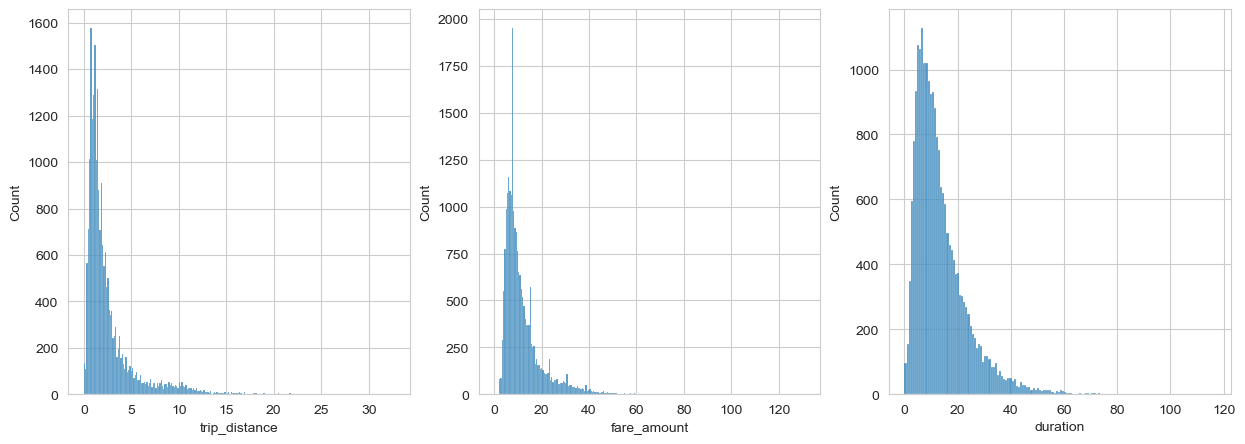

In [72]:
fig,ax= plt.subplots(1,3,figsize=(15,5))
sns.histplot(data=df03,x='trip_distance',ax=ax[0])
sns.histplot(data=df03,x='fare_amount',ax=ax[1])
sns.histplot(data=df03,x='duration',ax=ax[2])
plt.show()

### Feature engineering

##### Mean distance and duration between pickup/drop-off points

We want to predict the fare amount in advance. However, the trip duration or distance is not known in advance. However, the pickup and drop-off locations are, at least to within the grid system used by the taxi company. We can calculate the mean trip distance and duration between every pair of locations and use that as a predictor.

Make a new columns with the location pairs

In [73]:
df03['pickup_dropoff']=[(df03['PULocationID'].iloc[i],df03['DOLocationID'].iloc[i]) for i in range(0,df03.shape[0],1)]

Next, add a column with the mean distance for that pair of locations

In [95]:
grouped=df03.groupby('pickup_dropoff')['trip_distance'].mean()
grouped.head()

pickup_dropoff
(4, 4)     0.32
(4, 37)    5.48
(4, 45)    2.24
(4, 74)    5.59
(4, 75)    5.06
Name: trip_distance, dtype: float64

In [96]:
grouped_dict=grouped.to_dict()
grouped_dict

{(4, 4): 0.32,
 (4, 37): 5.48,
 (4, 45): 2.24,
 (4, 74): 5.59,
 (4, 75): 5.06,
 (4, 79): 0.79,
 (4, 80): 3.73,
 (4, 87): 3.3,
 (4, 107): 1.298,
 (4, 112): 4.4350000000000005,
 (4, 113): 0.96,
 (4, 114): 0.91,
 (4, 137): 1.6400000000000001,
 (4, 140): 3.7750000000000004,
 (4, 144): 1.0,
 (4, 148): 0.93,
 (4, 151): 6.8,
 (4, 158): 2.07,
 (4, 162): 2.6,
 (4, 163): 3.14,
 (4, 164): 2.14,
 (4, 170): 2.295,
 (4, 181): 7.07,
 (4, 186): 2.86,
 (4, 209): 2.6,
 (4, 211): 0.9299999999999999,
 (4, 224): 0.7,
 (4, 229): 2.465,
 (4, 230): 3.6,
 (4, 231): 2.8666666666666667,
 (4, 232): 0.8,
 (4, 236): 5.28,
 (4, 246): 2.71,
 (4, 249): 1.7666666666666666,
 (4, 255): 4.21,
 (7, 7): 0.768,
 (7, 48): 4.75,
 (7, 65): 10.26,
 (7, 79): 5.2,
 (7, 95): 7.2700000000000005,
 (7, 114): 6.9,
 (7, 129): 2.7,
 (7, 131): 10.51,
 (7, 141): 3.53,
 (7, 145): 1.405,
 (7, 146): 1.6099999999999999,
 (7, 162): 3.39,
 (7, 164): 5.27,
 (7, 179): 0.98,
 (7, 193): 0.6766666666666667,
 (7, 223): 0.5,
 (7, 226): 1.66,
 (7, 229):

In [97]:
df03['mean_distance']=df03['pickup_dropoff'].map(grouped_dict)

Same for mean duration:

In [91]:
grouped_dict=df03.groupby('pickup_dropoff')['duration'].mean().to_dict()
df03['mean_duration']=df03['pickup_dropoff'].map(grouped_dict)

In [98]:
df03.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,"(100, 231)",3.521667,22.847222,Saturday,March,False
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,"(186, 43)",3.108889,24.470370,Tuesday,April,False
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,"(262, 236)",0.881429,7.250000,Friday,December,True
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,"(188, 97)",3.700000,30.250000,Sunday,May,False
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,"(4, 112)",4.435000,14.616667,Saturday,April,False


<Axes: xlabel='mean_distance', ylabel='fare_amount'>

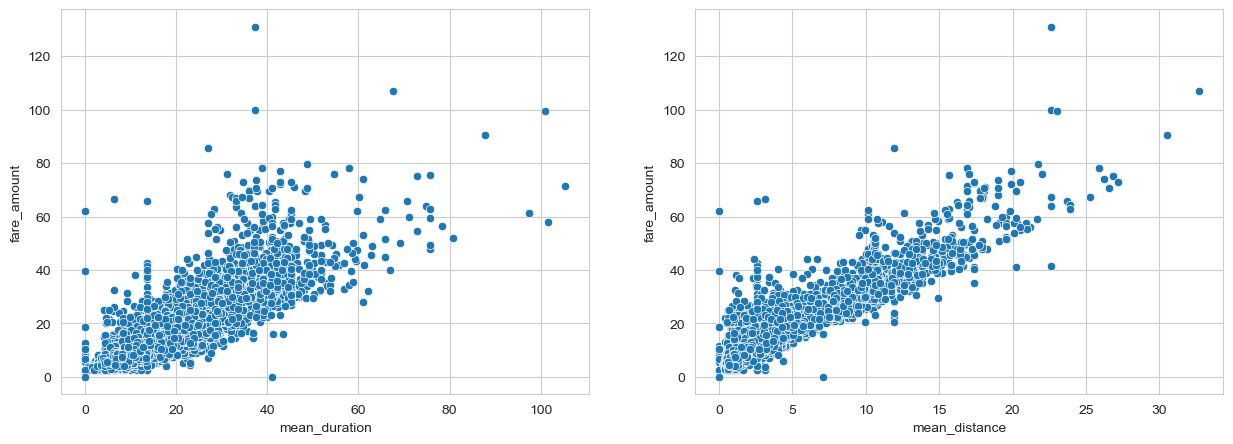

In [99]:
fig, ax= plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data=df03,x='mean_duration',y='fare_amount',ax=ax[0])
sns.scatterplot(data=df03,x='mean_distance',y='fare_amount',ax=ax[1])

##### day, month and rush_hour columns

Make day and month columns

In [100]:
df03['day']=df03['tpep_pickup_datetime'].dt.strftime('%A')
df03['month']=df03['tpep_pickup_datetime'].dt.strftime('%B')
df03[['day','month']].head()

,day,month
0,Saturday,March
1,Tuesday,April
2,Friday,December
3,Sunday,May
4,Saturday,April


Rush hour

In [101]:
mask1=~(df03['day'].isin(['Saturday', 'Sunday']))
mask2=  (datetime.time(6,0,0)<df03['tpep_pickup_datetime'].dt.time)  & (df03['tpep_pickup_datetime'].dt.time<datetime.time(10,0,0) ) 
mask3=  (datetime.time(6,0,0)<df03['tpep_dropoff_datetime'].dt.time) & (df03['tpep_dropoff_datetime'].dt.time < datetime.time(10,0,0))
# If day is Saturday or Sunday, impute 0 in `rush_hour` column
### YOUR CODE HERE ###
df03['rush_hour']=mask1 & mask2 & mask3

(0.0, 40.0)

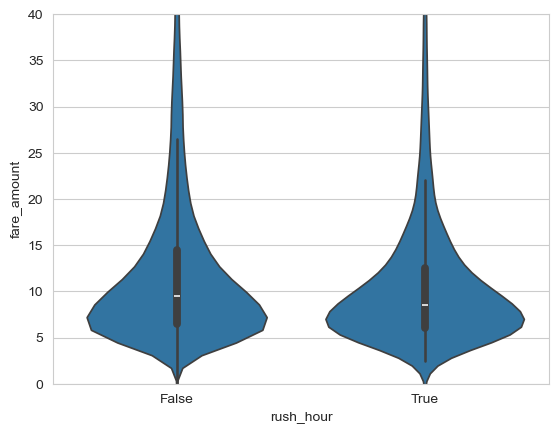

In [102]:
ax=sns.violinplot(data=df03,y='fare_amount',x='rush_hour')
ax.set_ylim(0,40)

Not much difference in fare_amount due to rush hour

### Isolate and visualize modelling variables

In [103]:
df04=df03.drop(columns=['Unnamed: 0', 'VendorID','tpep_pickup_datetime','tpep_dropoff_datetime', 'RatecodeID','store_and_fwd_flag','PULocationID', 'DOLocationID','extra', 'mta_tax','improvement_surcharge', 'tip_amount','payment_type','tolls_amount','total_amount','trip_distance','duration'])

In [104]:
df04.head()

,passenger_count,fare_amount,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,6,13.0,"(100, 231)",3.521667,22.847222,Saturday,March,False
1,1,16.0,"(186, 43)",3.108889,24.470370,Tuesday,April,False
2,1,6.5,"(262, 236)",0.881429,7.250000,Friday,December,True
3,1,20.5,"(188, 97)",3.700000,30.250000,Sunday,May,False
4,1,16.5,"(4, 112)",4.435000,14.616667,Saturday,April,False


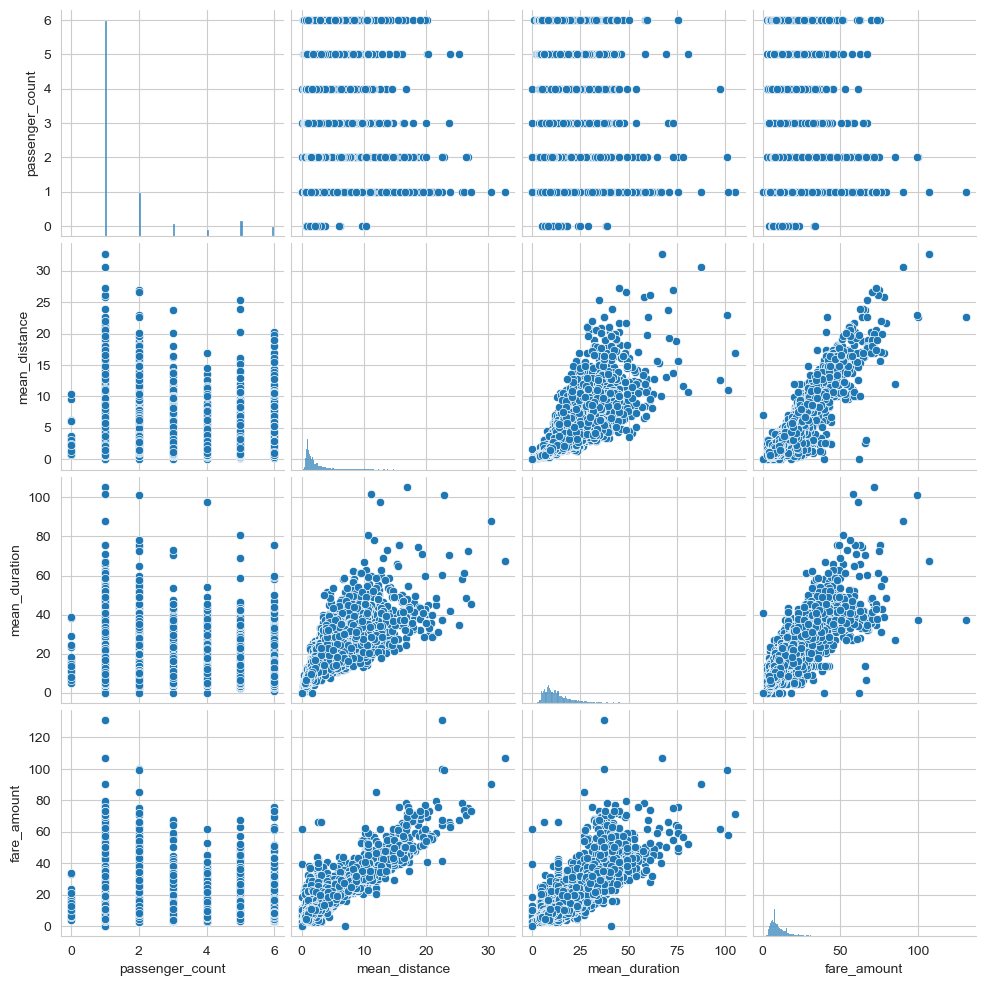

In [108]:
sns.pairplot(data=df04,vars=['passenger_count','mean_distance','mean_duration','fare_amount'])

There appears to be linear correlation. Let's examine this further.

In [109]:
C=df04[['passenger_count','mean_distance','mean_duration','fare_amount']].corr()
C

,passenger_count,mean_distance,mean_duration,fare_amount
passenger_count,1.000000,0.011675,0.013217,0.012210
mean_distance,0.011675,1.000000,0.852667,0.924442
mean_duration,0.013217,0.852667,1.000000,0.873212
fare_amount,0.012210,0.924442,0.873212,1.000000


<Axes: >

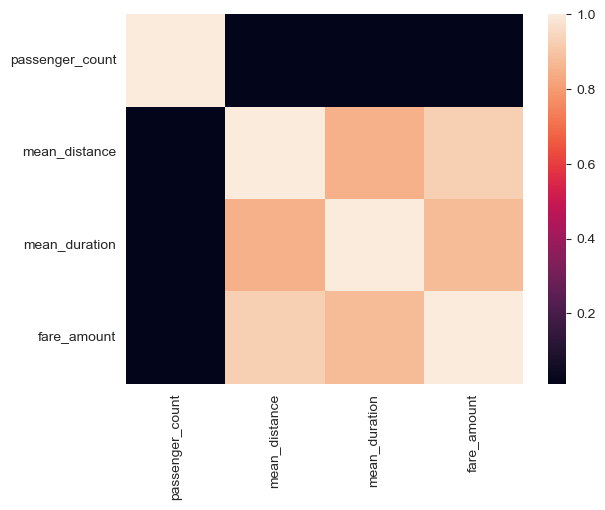

In [110]:
sns.heatmap(C)

passenger_count does not correlate with fare amount but mean_distance and mean_duration do. So we use mean_distance and mean_duration as predictor variables.

In [111]:
y=df04[['fare_amount']]
x=df04[['mean_distance', 'mean_duration']]

### Prepare the data

Split into train and test data

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
y_train=y_train.reset_index(drop=True)# this is need for latter steps
x_train=x_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)
x_test=x_test.reset_index(drop=True)

Standardize the X variables

In [117]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled=pd.DataFrame(scaler.transform(x_train),columns=['mean_distance','mean_duration'])

### Fit the model

We perform linear regression.

In [118]:
form='fare_amount ~ mean_distance + mean_duration'
model=smf.ols(formula=form,data=pd.concat([x_train_scaled, y_train], axis = 1))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                 6.568e+04
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:49:52   Log-Likelihood:                -43965.
No. Observations:               17538   AIC:                         8.794e+04
Df Residuals:                   17535   BIC:                         8.796e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.9041      0.022    531.105      0.000      11.860      11.948
mean_distance     5.6846      0.043    133.076      0.000       5.601       5.768
mean_duration     2.7167      0.043     63.597      0.000       2.633       2.800
==============================================================================
Omnibus:                    14873.194   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1652204.552
Skew:                           3.513   Prob(JB):                         0.00
Kurtosis:                      50.028   Cond. No.                         3.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
print('Mean square error:', results.mse_resid) # mean square error
print('Mean absolute error:',abs(results.resid).mean()) # mean absolute error
print('R^2:', 1-results.mse_resid/results.mse_total) # R^2

Mean square error: 8.810687324550935
Mean absolute error: 1.8724551178564919
R^2: 0.8822117003527031


### Test the model

In [120]:
x_test_scaled=pd.DataFrame(scaler.transform(x_test),columns=['mean_distance','mean_duration'])

In [138]:
yp=results.predict(x_test_scaled)
resids=(yp-y_test['fare_amount']).to_numpy()#Note element-wise subtraction works because y_test is a Series

In [150]:
print('Mean square error:',(resids**2).mean()) # mean square error
print('Mean absolute error:',abs(resids).mean()) # mean absolute error
print('R^2:',1-(resids**2).mean()/((y_test-y_test.mean())**2).mean().iloc[0]) # R^2

Mean square error: 9.763835097696811
Mean absolute error: 1.9064714496642392
R^2: 0.8765153696497642


In [151]:
# Create a `results` dataframe

res=pd.DataFrame()
res['actual']=y_test
res['predicted']=results.predict(x_test_scaled)
res['residual']=res['actual']-res['predicted']

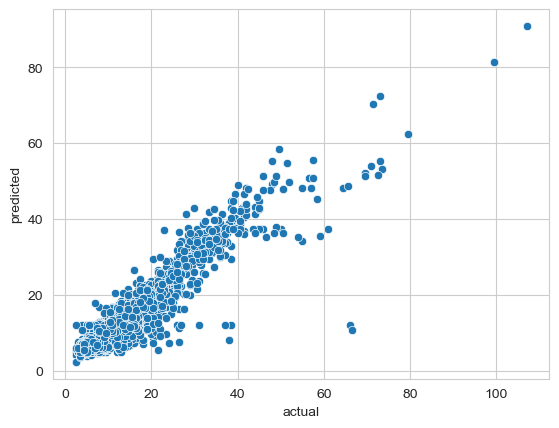

In [155]:
sns.scatterplot(data=res,x='actual',y='predicted');

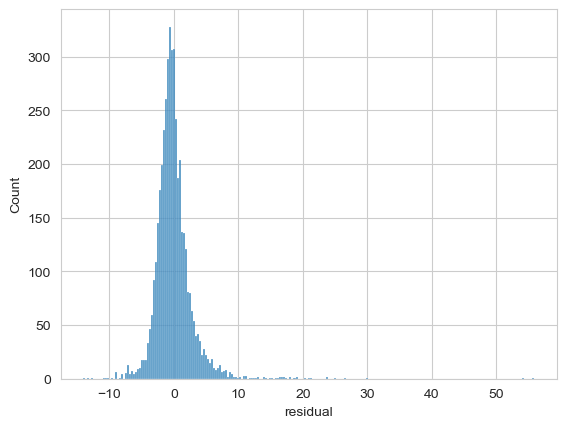

In [154]:
sns.histplot(res['residual']);

In [156]:
res['residual'].mean()

0.037957454687203455

The test residuals are close to normally distributed.

<Axes: xlabel='predicted', ylabel='residual'>

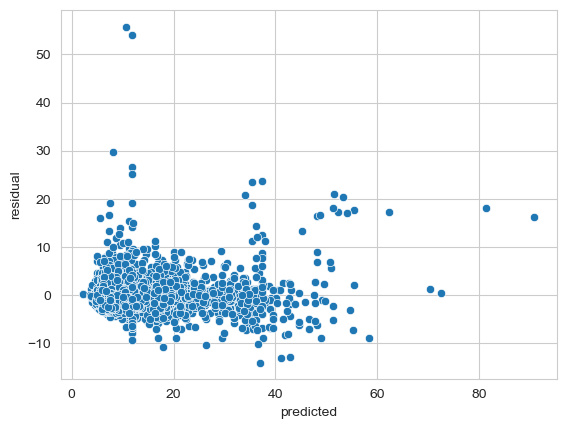

In [157]:
sns.scatterplot(data=res,y='residual',x='predicted')

and are independent of the predicted value

### Interpreting the model

The model parameters are

In [222]:
p=results.params
p=pd.DataFrame({'scaled':p})
p

,scaled
Intercept,11.904065
mean_distance,5.684590
mean_duration,2.716652


In [208]:
scaler.feature_names_in_

array(['mean_distance', 'mean_duration'], dtype=object)

In [207]:
scaler.mean_

array([ 2.57938611, 13.60713889])

In [206]:
scaler.var_

array([ 7.64008393, 74.25624438])

In [224]:
p.loc['mean_distance','unscaled']=p['scaled'].loc['mean_distance']/np.sqrt(scaler.var_[0])
p.loc['mean_duration','unscaled']=p['scaled'].loc['mean_duration']/np.sqrt(scaler.var_[1])
p.loc['Intercept','unscaled']=p['scaled'].loc['Intercept']-p['scaled'].loc['mean_distance']*scaler.mean_[0]/np.sqrt(scaler.var_[0])-p['scaled'].loc['mean_duration']*scaler.mean_[1]/np.sqrt(scaler.var_[1])
p

,scaled,unscaled
Intercept,11.904065,2.309523
mean_distance,5.684590,2.056601
mean_duration,2.716652,0.315259


So the predicted fare amount in dollars is 2.31 + 2.06*(mean_distance in miles) + 0.32*(mean_duration in minutes)